In [1]:
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, img_as_float, color, io
from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral, denoise_wavelet, estimate_sigma)
from skimage.util import random_noise

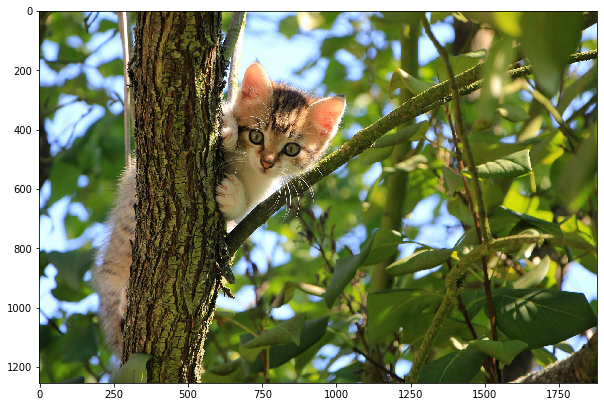

In [2]:
kitten = img_as_float(io.imread('images/kitten.jpeg'))

plt.figure(figsize=(10,8))
plt.imshow(kitten)

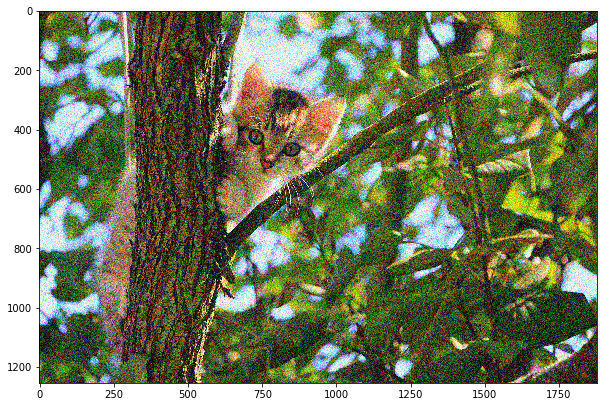

In [3]:
sigma = 0.155

noisy_kitten = random_noise(kitten, var=sigma**2)

plt.figure(figsize=(10,8))
plt.imshow(noisy_kitten)

In [4]:
# this gives the sigma value if we dont know it
sigma_est = estimate_sigma(noisy_kitten, multichannel=True, average_sigmas=True)

print('Estimated Gaussian noise standard deviation={}'.format(sigma_est))

Estimated Gaussian noise standard deviation=0.1362758965205987


In [5]:
denoise_tv1 = denoise_tv_chambolle(noisy_kitten, weight=0.1, multichannel=True)

In [6]:
denoise_tv2 = denoise_tv_chambolle(noisy_kitten, weight=0.2, multichannel=True)

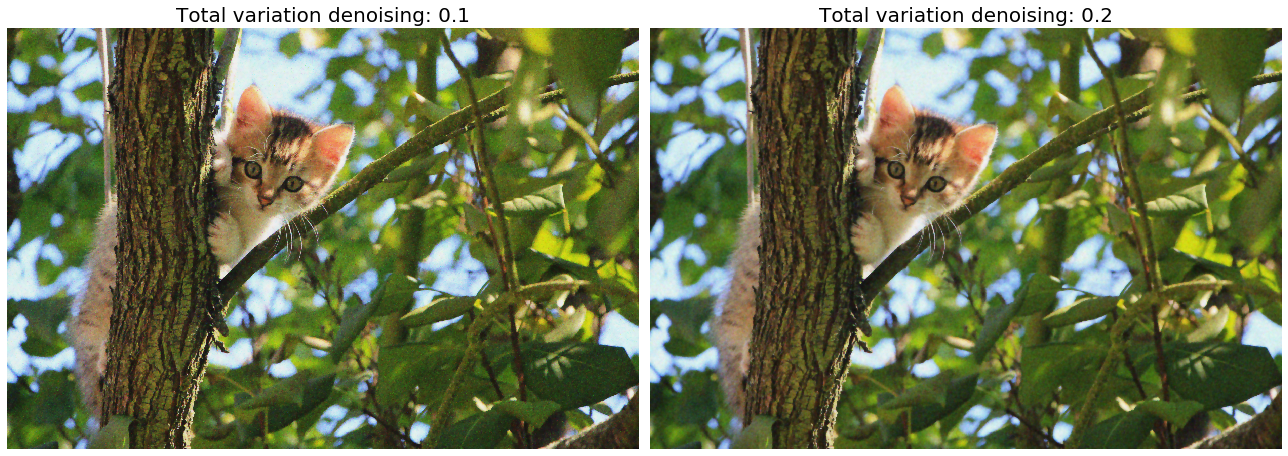

In [7]:
fig, ax = plt.subplots(1,2,figsize=(18,14), sharex=True, sharey=True)

ax[0].imshow(denoise_tv1)
ax[0].axis('off')
ax[0].set_title('Total variation denoising: 0.1', fontsize=20)

ax[1].imshow(denoise_tv2)
ax[1].axis('off')
ax[1].set_title('Total variation denoising: 0.2', fontsize=20)

fig.tight_layout()
plt.show()

In [8]:
denoise_bi1 = denoise_bilateral(noisy_kitten, sigma_color=0.05, sigma_spatial=15, multichannel=True)

In [9]:
denoise_bi2 = denoise_bilateral(noisy_kitten, sigma_color=0.1, sigma_spatial=15, multichannel=True)

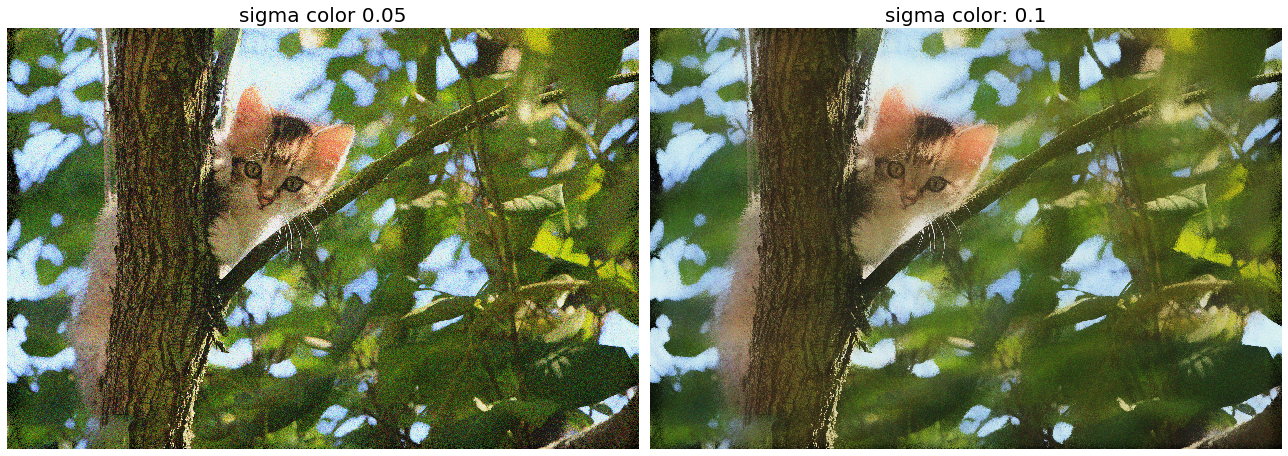

In [10]:
fig, ax = plt.subplots(1,2,figsize=(18,14), sharex=True, sharey=True)

ax[0].imshow(denoise_bi1)
ax[0].axis('off')
ax[0].set_title('sigma color 0.05', fontsize=20)

ax[1].imshow(denoise_bi2)
ax[1].axis('off')
ax[1].set_title('sigma color: 0.1', fontsize=20)

fig.tight_layout()
plt.show()

In [11]:
denoise_wave1 = denoise_wavelet(noisy_kitten, mode='soft', multichannel='True', convert2ycbcr=True)

C:\Users\NEHA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: As of scikit-image 0.16, automated rescaling of sigma to match any internal rescaling of the image is performed. Setting rescale_sigma to False, will disable this new behaviour. To avoid this warning the user should explicitly set rescale_sigma to True or False.
  """Entry point for launching an IPython kernel.


In [14]:
denoise_wave2 = denoise_wavelet(noisy_kitten, mode='soft', multichannel='True', convert2ycbcr=False)

C:\Users\NEHA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: As of scikit-image 0.16, automated rescaling of sigma to match any internal rescaling of the image is performed. Setting rescale_sigma to False, will disable this new behaviour. To avoid this warning the user should explicitly set rescale_sigma to True or False.
  """Entry point for launching an IPython kernel.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


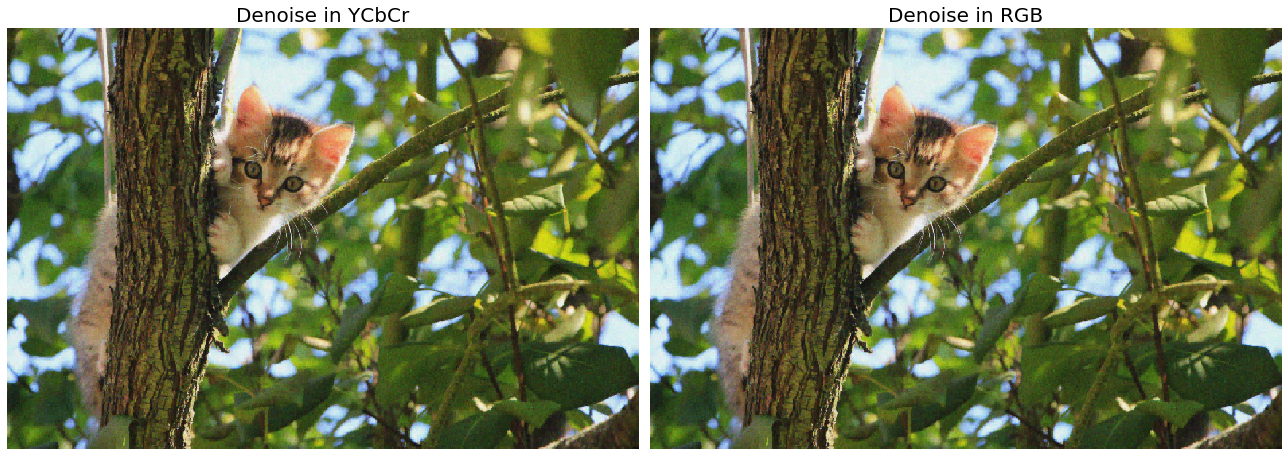

In [15]:
fig, ax = plt.subplots(1,2,figsize=(18,14), sharex=True, sharey=True)

ax[0].imshow(denoise_wave1)
ax[0].axis('off')
ax[0].set_title('Denoise in YCbCr', fontsize=20)

ax[1].imshow(denoise_wave2)
ax[1].axis('off')
ax[1].set_title('Denoise in RGB', fontsize=20)

fig.tight_layout()
plt.show()